## Model IV

* **Corpora**: 

    * Norms: McRae et al. (2005)
    * Information Corpus: Brown

* **Model**: Jacob & Katrin Model

    * Ideas:
        * [ASSUMPTION] The properties of an unknown word $u$ are only learned from the predicates $V=\{v_1,...,v_k\}$ for which $w$ is an argument in either of two core argument positions -- subject, object.
        * [ASSUMPTION] $P$ is representative of all the possible properties.
        * [DEFINITION] A predicate $v$ is an information unit which comprises two Dirichlet Distributions over the set of all properties $P$: $Dir(\alpha_{subj}),Dir(\alpha_{obj})$.
        * [DEFINITION] A word $w$ is associated with a Dirichlet Distribution over $P$: $Dir(\beta)$. The corresponding distribution of an unknown word $u$ is $Dir(\beta),\beta=(1,...)$.
    
    * Procedure:
        * Training: Learning predicates (i.e. information units) $V=\{v_1,...,v_k\}$ with a corpus -- updating their Dirichlet Distributions over $P$: $Dir(\alpha_{subj}),Dir(\alpha_{obj})$.
        * Learning: On encounter a sentence $s$ where $u$ is the target unknown word and $v$ is the predicate of $u$, update $Dir(\beta)$ of $u$ to $Dir(\alpha+\beta)$, where $\alpha$ could either be $\alpha_{subj}$ or $\alpha_{obj}$.
        * Evalution: After exposure to a set of sentences, take $k$ samples from the final $Dir(\beta)$, and
            * Qualitative: Observe the spikes in the samples, see if they correspond to intuition.
            * Quantitative: Compute average entropy of sample distribution (multinomials) -- lower entropy indicates good learning outcome.
    
    * Algorithm:
        * Let $W$ be the set of norm nouns ($W_{subj},W_{obj}$ are subj/obj-only sets), $V$ be the set of verbs which have at least one $w\in W$ evidenced in its core argument position, $P$ be the set of properties.
        * For each $v\in V$, make two lists $v_{subj}$ and $v_{obj}$ -- lists of occurred $w$s in the subject and the object position.
        * Count the associated properties of $w$s in $v_{subj}$ and $v_{obj}$ for each $v\in V$, with which we then construct $Dir(\alpha_{subj})$ and $Dir(\alpha_{obj})$ for $v\in V$.
        * For the target unknown word $u$, expose it to $n$ sentences, and do $Dir(\alpha+\beta)$ updates.
        * Evaluate a sample set of $k$ from the final $Dir(\beta)$.

## 0. Load Corpora

### A. Norms

In [1]:
import pandas as pd

In [2]:
data_path = "/Users/jacobsw/Desktop/CODER/IMPLEMENTATION_CAMP/BASIC_TOPICS/DISTRIBUTIONAL_SEMANTICS/DATA/McRae-BRM-InPress/"

In [3]:
df = pd.read_csv(data_path+"CONCS_FEATS_concstats_brm.xls", delimiter='\t')

In [4]:
print df.columns

Index([u'Concept', u'Feature', u'WB_Label', u'WB_Maj', u'WB_Min', u'BR_Label',
       u'Prod_Freq', u'Rank_PF', u'Sum_PF_No_Tax', u'CPF', u'Disting',
       u'Distinct', u'CV_No_Tax', u'Intercorr_Str_Tax',
       u'Intercorr_Str_No_Tax', u'Feat_Length_Including_Spaces', u'Phon_1st',
       u'KF', u'ln(KF)', u'BNC', u'ln(BNC)', u'Familiarity', u'Length_Letters',
       u'Length_Phonemes', u'Length_Syllables', u'Bigram', u'Trigram',
       u'ColtheartN', u'Num_Feats_Tax', u'Num_Feats_No_Tax',
       u'Num_Disting_Feats_No_Tax', u'Disting_Feats_%_No_Tax',
       u'Mean_Distinct_No_Tax', u'Mean_CV_No_Tax', u'Density_No_Tax',
       u'Num_Corred_Pairs_No_Tax', u'%_Corred_Pairs_No_Tax', u'Num_Func',
       u'Num_Vis_Mot', u'Num_VisF&S', u'Num_Vis_Col', u'Num_Sound',
       u'Num_Taste', u'Num_Smell', u'Num_Tact', u'Num_Ency', u'Num_Tax'],
      dtype='object')


In [5]:
df.head(10)

,Concept,Feature,WB_Label,WB_Maj,WB_Min,BR_Label,Prod_Freq,Rank_PF,Sum_PF_No_Tax,CPF,...,Num_Func,Num_Vis_Mot,Num_VisF&S,Num_Vis_Col,Num_Sound,Num_Taste,Num_Smell,Num_Tact,Num_Ency,Num_Tax
0,accordion,a_musical_instrument,superordinate,c,h,taxonomic,28,1,NaN,18,...,2,0,2,0,2,0,0,0,2,1
1,accordion,associated_with_polkas,associated_entity,s,e,encyclopaedic,9,4,9.0,1,...,2,0,2,0,2,0,0,0,2,1
2,accordion,has_buttons,external_component,e,ce,visual-form_and_surface,8,5,163.0,13,...,2,0,2,0,2,0,0,0,2,1
3,accordion,has_keys,external_component,e,ce,visual-form_and_surface,17,2,108.0,7,...,2,0,2,0,2,0,0,0,2,1
4,accordion,inbeh_-_produces_music,entity_behavior,e,b,sound,6,7,178.0,13,...,2,0,2,0,2,0,0,0,2,1
5,accordion,is_loud,external_surface_property,e,se,sound,6,7,317.0,34,...,2,0,2,0,2,0,0,0,2,1
6,accordion,requires_air,contingency,i,c,encyclopaedic,11,3,49.0,4,...,2,0,2,0,2,0,0,0,2,1
7,accordion,used_by_moving_bellows,action,s,a,function,8,5,8.0,1,...,2,0,2,0,2,0,0,0,2,1
8,accordion,worn_on_chest,function,s,f,function,6,7,6.0,1,...,2,0,2,0,2,0,0,0,2,1
9,airplane,beh_-_flies,entity_behavior,e,b,visual-motion,25,1,712.0,46,...,3,3,5,0,0,0,0,0,2,0


### B. Brown

In [6]:
from nltk.corpus import brown
from spacy.en import English

In [7]:
parser = English()

In [8]:
brown_sents = [unicode(' '.join(sent)) for sent in brown.sents()]

In [9]:
%%time
parsed_sents = [parser(sent) for sent in brown_sents]

CPU times: user 1min 34s, sys: 746 ms, total: 1min 35s
Wall time: 1min 35s


In [10]:
def make_token2lemma_dict(parsed_sents):
    
    lemmas = set()
    token2lemma = {}
    for parsed_sent in parsed_sents:
        for token in parsed_sent:
            token2lemma[token.orth_] = token.lemma_
            lemmas.add(token.lemma_)
    
    return lemmas, token2lemma

In [11]:
%%time
brown_lemmas, brown_t2l = make_token2lemma_dict(parsed_sents)

CPU times: user 1.28 s, sys: 40.2 ms, total: 1.32 s
Wall time: 1.3 s


In [12]:
print brown_t2l['books']

book


### C. Synchronize Norms & Brown

In [13]:
norms = {df.ix[i]['Concept'] for i in range(df.shape[0])}

In [14]:
def norm_normalize(norm):
    
    norm = norm.split('_')[0] if '_' in norm else norm
    if norm in brown_t2l: return brown_t2l[norm]
    return norm


In [15]:
print norm_normalize('cat_(kitchen)')
print norm_normalize('cat')

cat
cat


In [16]:
# Count Out-Of-Vocab Norms For Brown
t = [] 
for norm in norms:
    norm = norm.split('_')[0] if '_' in norm else norm
    if norm in brown_lemmas or norm in brown_t2l: continue
    t.append(norm)

In [17]:
print t
print len(t)

['earmuffs', 'bike', 'screwdriver', 'unicycle', 'camisole', 'crossbow', 'hamster', 'bra', 'sledgehammer', 'skateboard', 'leotards', 'rhubarb', 'platypus', 'pelican', 'minnow', 'canary', 'spatula', 'motorcycle', 'iguana', 'chickadee', 'giraffe', 'tricycle', 'bazooka', 'tomahawk', 'ostrich', 'cucumber', 'lettuce', 'whale', 'stork', 'bluejay', 'colander', 'chipmunk', 'escalator', 'partridge', 'parka', 'zucchini', 'dunebuggy', 'machete', 'crowbar', 'housefly', 'blender', 'nectarine', 'scooter', 'cougar', 'penguin', 'emu', 'honeydew', 'wheelbarrow', 'harmonica', 'eggplant', 'groundhog', 'harpoon', 'yam', 'squid', 'toaster', 'moose', 'tuna', 'surfboard', 'nylons', 'raven', 'budgie', 'fridge', 'gopher', 'flamingo', 'sleigh', 'trombone', 'strainer', 'dagger', 'chimp', 'buzzard', 'guppy', 'grater', 'nightgown', 'cello', 'hornet', 'finch', 'tangerine', 'gorilla', 'caribou']
79


** SPECIAL BLOCK: FOR LEAVE-ONE-OUT **

In [21]:
out_word = 'alligator'
norms = filter(lambda norm: norm!=out_word, map(lambda norm:norm_normalize(norm), norms))

In [22]:
norms = map(lambda norm:norm_normalize(norm), norms)

In [23]:
norms_set = set(norms) # for faster lookup

### D. Make Norm2Prop Dictionary

In [114]:
def make_norm2prop(df):

    norm2prop = defaultdict(list)
    for i in xrange(df.shape[0]):
        norm2prop[norm_normalize(df['Concept'][i])].append(df['Feature'][i]) # all unique in McRae.
    
    return norm2prop

In [115]:
norm2prop = make_norm2prop(df) # only 532 after normalization, diminished distinction a bit, but who cares.

## I. Training

In [24]:
def extract_dep_triples(parsed_sents):
    
    triples = []
    for parsed_sent in parsed_sents:
        for token in parsed_sent:
            lemma_triple = (token.lemma_, token.dep_, token.head.lemma_)
            triples.append(lemma_triple)
    
    return triples

In [25]:
%%time
dep_triples = extract_dep_triples(parsed_sents)

CPU times: user 1.02 s, sys: 135 ms, total: 1.15 s
Wall time: 1.15 s


In [116]:
features = {df.ix[i]['Feature'] for i in range(df.shape[0])}
f2i = {f:i for i,f in enumerate(features)}
feature_list = list(features)

In [117]:
from collections import defaultdict
import numpy as np

In [205]:
P = len(features)
def initialize_propdist(P): 
    return np.zeros(P) + 1e-20
def get_props(w):
    return norm2prop[w]

In [206]:
def training(triples):
    
    V = defaultdict(lambda : defaultdict(lambda : initialize_propdist(P)))
    for triple in triples:
        if triple[1].endswith('subj') and norm in norms_set:
            props = get_props(triple[0])
            for prop in props:
                V[triple[2]]['subj'][f2i[prop]] += 1
        elif triple[1].endswith('obj') and norm in norms_set:
            props = get_props(triple[0])
            for prop in props:
                V[triple[2]]['obj'][f2i[prop]] += 1
        else: pass
    
    return V

In [207]:
%%time
V = training(dep_triples)

CPU times: user 1.03 s, sys: 12.5 ms, total: 1.05 s
Wall time: 1.04 s


In [208]:
print len(V) # 845 predicates trained

845


In [209]:
print V['feed']['subj']
print V['feed']['obj']

[  1.00000000e-20   1.00000000e-20   1.00000000e-20 ...,   1.00000000e-20
   1.00000000e-20   1.00000000e-20]
[  1.00000000e-20   1.00000000e-20   1.00000000e-20 ...,   1.00000000e-20
   1.00000000e-20   1.00000000e-20]


In [211]:
feed_obj_fts = [(feature_list[i],wgt) for i,wgt in enumerate(V['feed']['obj']) if wgt!=1]

## II. Learning

### A. Example I: 'Alligator' with 'Feed' vs. 'Is'

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
def single_update(v, argtype): # argtype = {subj, obj}
    
    w_beta = initialize_propdist(P)
    v_alphas = V[v][argtype] # alpha as a list
    for i,alpha_i in enumerate(v_alphas):
        if alpha_i!=1: # i.e. the prop at the position has been seen
            w_beta[i] += alpha_i
    
    return w_beta


In [242]:
def normalized_weight_plot(w, v, w_beta, topk=5):
    
    w_beta = w_beta / w_beta.sum()
    plt.plot(w_beta)
    plt.title('Word: %s | Updated by %s' % (w, v))
    plt.xlabel('Prop Weights')
    plt.ylabel('Weights')
    plt.show()
    
    print entropy(w_beta); print
    
    topk_props_idx = np.argsort(w_beta)[::-1][:topk]
    for i,idx in enumerate(topk_props_idx):
        print "%dth Property: %s (prob=%.6f%%,idx=%d)" % (i+1,feature_list[idx],w_beta[idx],idx)


In [243]:
# sent: 'john fed an alligator.'
feed_update = single_update('feed', 'obj')

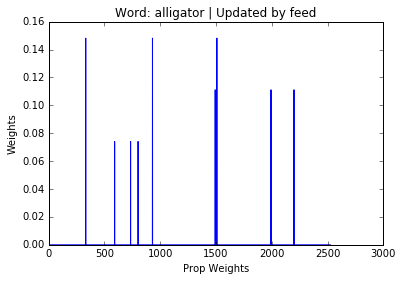

2.15946923583

1th Property: an_animal (prob=0.148148%,idx=931)
2th Property: has_4_legs (prob=0.148148%,idx=1508)
3th Property: has_a_tail (prob=0.148148%,idx=333)
4th Property: beh_-_eats (prob=0.111111%,idx=1993)
5th Property: is_edible (prob=0.111111%,idx=1493)


In [244]:
normalized_weight_plot('alligator', 'feed', feed_update)

In [245]:
# sent: 'this alligator is a start.'
is_update = single_update('be', 'subj')

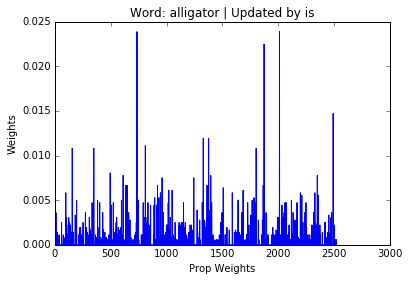

5.699702862

1th Property: made_of_wood (prob=0.023876%,idx=2012)
2th Property: is_large (prob=0.023876%,idx=735)
3th Property: made_of_metal (prob=0.022488%,idx=1874)
4th Property: is_small (prob=0.014714%,idx=2493)
5th Property: has_doors (prob=0.011938%,idx=1377)


In [246]:
normalized_weight_plot('alligator', 'is', is_update)

### B. Example II: 3 Step Updates

In [219]:
from scipy.stats import entropy

In [297]:
class Update:
    
    def __init__(self, word):
        self.word = word
        self.w_beta = initialize_propdist(P)
        
    def single_update(self, v, argtype): 
        v_alphas = V[v][argtype] 
        for i,alpha_i in enumerate(v_alphas):
            if alpha_i!=1e-20: 
                self.w_beta[i] += alpha_i
    
    def top_k_properties(self, topk=5):
        topk_props_idx = np.argsort(self.w_beta)[::-1][:topk]
        for i,idx in enumerate(topk_props_idx):
            print "%dth Property: %s (wgt=%.6f,idx=%d)" % (i+1,feature_list[idx],self.w_beta[idx],idx)

    def plot_propdist_sample(self, size=100, figsize=(12,4)):
        
        propdists = np.random.dirichlet(self.w_beta, size)
        
        avg_propdist = np.mean(propdists,axis=0)
        plt.plot(avg_propdist)
        plt.title("Property Distribution for %s" % self.word)
        plt.xlabel("Properties")
        plt.ylabel("Probabilities")
        plt.show()
        
#         plt.subplots(figsize=figsize)
#         for i in range(size):
#             plt.subplot(100+size*10+i+1)
#             plt.plot(propdists[i])
#         plt.show()
    
    def compute_avg_ent(self, size=100):
        
        propdists = np.random.dirichlet(self.w_beta, size)
        avg_propdist = np.mean(propdists,axis=0)
        
        avg_ent = entropy(avg_propdist)
        print "Average Entropy: %.6f" % avg_ent    


In [298]:
informative_updates = Update('alligator')

In [299]:
informative_updates.single_update('feed','obj')
informative_updates.single_update('catch','obj')
informative_updates.single_update('roam','subj')

In [300]:
informative_updates.top_k_properties()

1th Property: has_4_legs (wgt=7.000000,idx=1508)
2th Property: an_animal (wgt=7.000000,idx=931)
3th Property: used_for_transportation (wgt=5.000000,idx=155)
4th Property: is_large (wgt=5.000000,idx=735)
5th Property: has_a_tail (wgt=5.000000,idx=333)


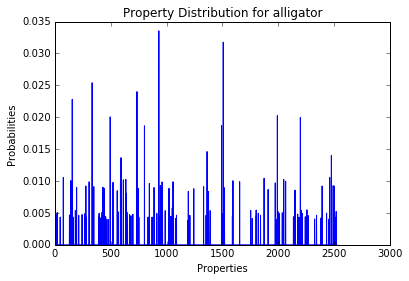

In [301]:
informative_updates.plot_propdist_sample()

In [302]:
informative_updates.compute_avg_ent()

Average Entropy: 4.679619


In [303]:
uninformative_updates = Update('alligator')

In [304]:
uninformative_updates.single_update('be','subj')
uninformative_updates.single_update('have','obj')
uninformative_updates.single_update('get','obj')

In [305]:
uninformative_updates.top_k_properties()

1th Property: made_of_metal (wgt=122.000000,idx=1874)
2th Property: made_of_wood (wgt=115.000000,idx=2012)
3th Property: is_large (wgt=106.000000,idx=735)
4th Property: is_small (wgt=79.000000,idx=2493)
5th Property: different_colours (wgt=75.000000,idx=348)


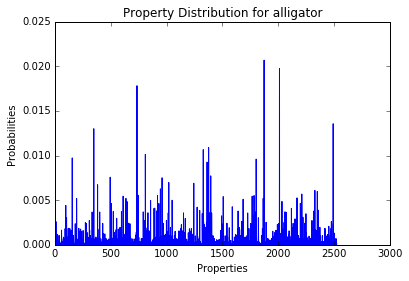

In [306]:
uninformative_updates.plot_propdist_sample()

In [307]:
uninformative_updates.compute_avg_ent()

Average Entropy: 6.169590
